Hybrid Forex prediction model using multiple regression, simulated annealing, reinforcement learning and technical analysis

https://www.researchgate.net/profile/Chihab-Younes/publication/366165718_Hybrid_Forex_prediction_model_using_multiple_regression_simulated_annealing_reinforcement_learning_and_technical_analysis/links/6393e9e0e42faa7e75aefbac/Hybrid-Forex-prediction-model-using-multiple-regression-simulated-annealing-reinforcement-learning-and-technical-analysis.pdf?origin=publication_detail

In [190]:
import MetaTrader5 as mt5
from datetime import datetime
import pytz
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import warnings
warnings.filterwarnings("ignore")
mt5.initialize()
account=51127988
password="Aar2frM7"
server = 'ICMarkets-Demo'

In [191]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import ta

In [193]:
def get_rates(pair1, timeframe, x):
    pair1 = pd.DataFrame(mt5.copy_rates_from_pos(pair1, timeframe, 0, x))
    pair1['time'] = pd.to_datetime(pair1['time'], unit = 's')
    return pair1


In [228]:
EURUSD = get_rates('XAUUSD.a', mt5.TIMEFRAME_D1, 100)
EURUSD = EURUSD[['close']]
for i in range(1,7):
    EURUSD[f'Period {i}'] = EURUSD['close'].shift(i)

EURUSD['2w'] = EURUSD['close'].rolling(window = 14).mean()
EURUSD['1m'] = EURUSD['close'].rolling(window = 30).mean()

EURUSD['rsi'] = ta.momentum.rsi(EURUSD['close'], window = 14, fillna = False)

EURUSD = EURUSD.dropna()

In [229]:
EU_x = EURUSD
EU_x = EU_x.drop('close', axis = 1)

In [230]:
# Defining X (features) and y (target)
X = EU_x
X = X.dropna()
y = EURUSD['close']

In [231]:
# Weighted regression
model = sm.OLS(y, EU_x).fit()

# Get predictions (for example purposes)
predictions = model.predict(X)
predictions.iloc[-1]

1908.5372149265568

In [205]:
vals = []
for i in range(250):
    predicted_price = model.predict(EU_x.iloc[-i])
    # print(f"{predicted_price.values[0]:.5f} vs actual close: {EURUSD['close'].iloc[-i]:.5f}")
    vals.append(predicted_price.values[0] - EURUSD['close'].iloc[i])

# Later, if you want to convert vals to a DataFrame or Series:
vals_df = pd.DataFrame(vals)

<AxesSubplot:>

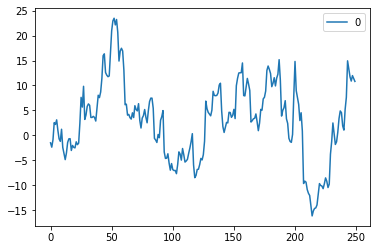

In [206]:
vals_df = vals_df * 1000
vals_df.plot()

In [201]:
predicted_price = model.predict(EU_x.iloc[-1])
predicted_price

None    1.069958
dtype: float64

In [204]:
predicted_price = model.predict(EU_x.iloc[-1])
predicted_price

None    1.069958
dtype: float64